In [1]:
!pip install matplotlib-venn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math, itertools
from matplotlib_venn import venn2

import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
eng_stopwords = set(stopwords.words("english"))
from nltk.stem import PorterStemmer
st = PorterStemmer()

from textblob import Word
import re
# sklearn libraries
from sklearn.pipeline                import Pipeline
from sklearn.linear_model            import LogisticRegression
from sklearn.naive_bayes             import MultinomialNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df1 =pd.read_csv('data/nfl.csv')
df2 =pd.read_csv('data/ncaa.csv')

In [4]:
df1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,url_overridden_by_dest,call_to_action,author_cakeday,link_flair_template_id,media_metadata
0,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Post Game Thread: Cincinnati Bengals (2-3) at ...,"[{'e': 'text', 't': 'Post Game Thread'}]",...,3015663,1.665372e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Game Thread: Cincinnati Bengals (2-2) at Balti...,"[{'e': 'text', 't': 'Game Thread'}]",...,3015663,1.665359e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Highlight] Cardinals miss the field goal and ...,"[{'e': 'text', 't': 'Highlight'}]",...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/lowlightheaven/status/1579...,NaN,NaN,NaN,NaN
3,NaN,nfl,NaN,t2_s82n19zx,False,NaN,0,False,[Highlight] Roughing the passer called. Stunning.,[],...,3015663,1.665346e+09,1,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/MentionPod/status/15792005...,NaN,NaN,NaN,NaN
4,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Stat Muse] Cooper Rush is 5-0 as a starter. O...,[],...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/statmuse/status/1579250511...,NaN,NaN,NaN,NaN


In [5]:
df2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,call_to_action,crosspost_parent_list,crosspost_parent,poll_data,author_cakeday,is_gallery,media_metadata,gallery_data
0,NaN,NCAA,NaN,t2_dz9aci0e,False,NaN,0,False,Mental Health Advisory Group to meet for first...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NCAA,NaN,t2_rnqvk,False,NaN,0,False,Early favorite emerges in Wisconsin Badgers He...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NCAA,"As promised, as i already did NCAA 2K's for ol...",t2_22akoaxt,False,NaN,0,False,NCAA 2K23 - how to download and install! ENJOY!,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NCAA,anthroscopic* \n\nI'm hoping to hear from athl...,t2_9ku39crx,False,NaN,0,False,Does arthroscopic surgery for a shoulder injur...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NCAA,NaN,t2_gohw27kc,False,NaN,0,False,Air Force football program put on probation by...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.shape

(976, 113)

In [7]:
# append two dataframe into one for data training
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)
df.shape

(1977, 114)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 114 entries, approved_at_utc to gallery_data
dtypes: bool(28), float64(24), int64(10), object(52)
memory usage: 1.4+ MB


In [9]:
df.subreddit.value_counts()

nfl     1001
NCAA     976
Name: subreddit, dtype: int64

In [10]:
#rename column
df.rename(columns = {'subreddit':'is_nfl'}, inplace = True)
# Create label column
df['is_nfl'] = df['is_nfl'].map({'NCAA':0, 'nfl':1})

In [11]:
df.is_nfl.value_counts()

1    1001
0     976
Name: is_nfl, dtype: int64

In [12]:
df = df[['is_nfl','author_fullname','title']].copy()

In [13]:
df.shape

(1977, 3)

In [14]:
df.isnull().sum()

is_nfl              0
author_fullname    32
title               0
dtype: int64

In [15]:
df.dropna(axis =0, inplace=True)
df.isnull().sum().sum()

0

In [16]:
df.shape

(1945, 3)

In [17]:
df.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=True)

In [18]:
df.shape

(1582, 3)

### Exploring quantitative properties of text

In [19]:
## Number of words in the text ##
df["num_words"] = df["title"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["title"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["title"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


## Average length of the words in the text ##
df["mean_word_len"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [20]:
df.head()

,is_nfl,author_fullname,title,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len
0,1,t2_plq2w,Post Game Thread: Cincinnati Bengals (2-3) at ...,10,10,68,1,7,5.900000
1,1,t2_plq2w,Game Thread: Cincinnati Bengals (2-2) at Balti...,9,8,63,1,7,6.111111
2,1,t2_gbzf7q,[Highlight] Cardinals miss the field goal and ...,10,10,67,2,3,5.800000
3,1,t2_s82n19zx,[Highlight] Roughing the passer called. Stunning.,6,6,49,1,4,7.333333
4,1,t2_gbzf7q,[Stat Muse] Cooper Rush is 5-0 as a starter. O...,21,21,100,7,5,3.809524


In [21]:
df.columns

Index(['is_nfl', 'author_fullname', 'title', 'num_words', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'mean_word_len'],
      dtype='object')

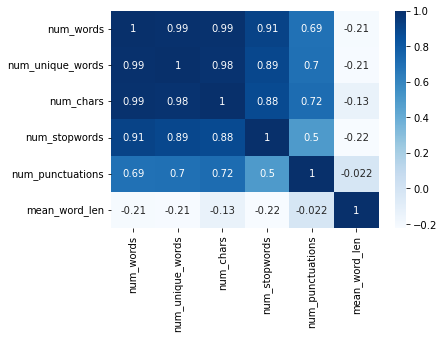

In [22]:
#correlation matrix of 'title_ave_length' 'title_word_count' 'title_length'
df_word = df[['num_words', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'mean_word_len']].copy()
corr = df_word.corr()
sns.heatmap(corr, cmap="Blues", annot=True);


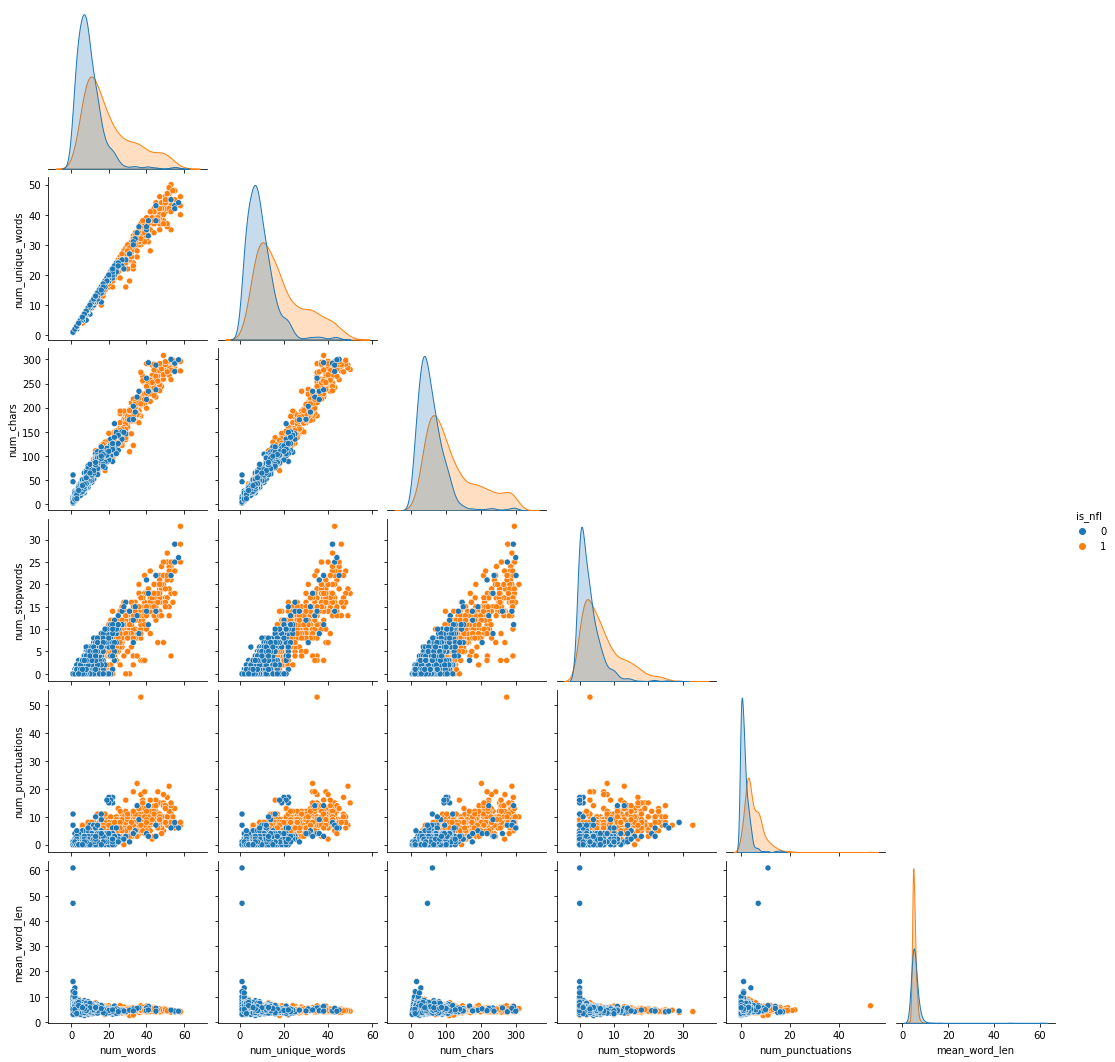

In [23]:
sns.pairplot(data=df, hue='is_nfl', corner =True);

In [24]:
df.groupby(['is_nfl']).agg(['mean']).round(2)

,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len
,mean,mean,mean,mean,mean,mean
is_nfl,,,,,,
0,9.61,9.31,56.88,2.76,1.46,5.44
1,20.13,18.46,116.52,6.58,5.17,5.05


### Exploring most common words

#### Lower casing

In [25]:
def lower_case(df):
    df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['title'].head())

In [26]:
lower_case(df)

0    post game thread: cincinnati bengals (2-3) at ...
1    game thread: cincinnati bengals (2-2) at balti...
2    [highlight] cardinals miss the field goal and ...
3    [highlight] roughing the passer called. stunning.
4    [stat muse] cooper rush is 5-0 as a starter. o...
Name: title, dtype: object


#### remove punctuation

In [27]:
def punctuation_removal(df):
    df['title'] = df['title'].str.replace('[^\w\s]','')
    print(df['title'].head())

In [28]:
punctuation_removal(df)

0    post game thread cincinnati bengals 23 at balt...
1    game thread cincinnati bengals 22 at baltimore...
2    highlight cardinals miss the field goal and ea...
3        highlight roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object


In [29]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['title'])
#putting results into dataframe
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())

In [30]:
df_cvec

,00,02,0200,021,031,04,07,0for4,0for6,10,...,zadarius,zaga,zaire,zappe,zero,zhao,zone,zoo,zoom,zrebiec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_cvec_series = pd.Series(df_cvec.sum())
df_cvec_series 

00          2
02          1
0200        1
021         1
031         1
           ..
zhao        1
zone       10
zoo         1
zoom        1
zrebiec     2
Length: 4677, dtype: int64

In [32]:
df1_cvec= cvec.fit_transform(df1['title'])
df1_cvec = pd.DataFrame(df1_cvec.todense(), columns=cvec.get_feature_names_out())

In [33]:
df2_cvec= cvec.fit_transform(df2['title'])
df2_cvec = pd.DataFrame(df2_cvec.todense(), columns=cvec.get_feature_names_out())

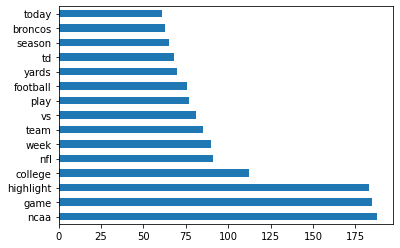

In [34]:
#Most common words
df_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

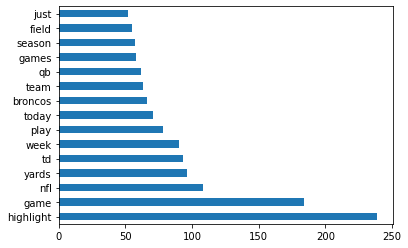

In [35]:
#Most common words in nfl subreddit
df1_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [36]:
freq1 = pd.Series(df1_cvec.sum().sort_values(ascending =False)[:10])
freq1

highlight    239
game         184
nfl          108
yards         96
td            93
week          90
play          78
today         71
broncos       66
team          63
dtype: int64

In [37]:
freq1 = list(freq1.index)
freq1 

['highlight',
 'game',
 'nfl',
 'yards',
 'td',
 'week',
 'play',
 'today',
 'broncos',
 'team']

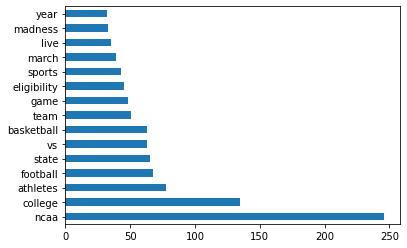

In [38]:
#Most common words in ncaa subreddit
df2_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [39]:
freq2 = pd.Series(df2_cvec.sum().sort_values(ascending =False)[:10])
freq2 

ncaa           246
college        135
athletes        78
football        68
state           65
vs              63
basketball      63
team            51
game            48
eligibility     45
dtype: int64

In [40]:
freq2 = list(freq2.index)
freq2 

['ncaa',
 'college',
 'athletes',
 'football',
 'state',
 'vs',
 'basketball',
 'team',
 'game',
 'eligibility']

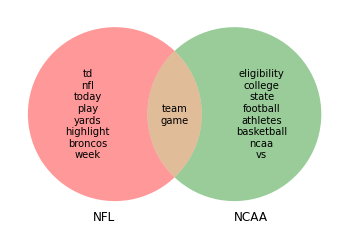

In [41]:
A = set(['highlight','game','nfl','yards','td','week', 'play','today', 'broncos','team'])
B = set(['ncaa','college','athletes','football','state','vs','basketball', 'team','game','eligibility'])

v = venn2([A,B], ('NFL', 'NCAA'))

v.get_label_by_id('100').set_text('\n'.join(A-B))
v.get_label_by_id('110').set_text('\n'.join(A&B))
v.get_label_by_id('010').set_text('\n'.join(B-A))

### Exploring authors


In [42]:
#number of unique auther
df['author_fullname'].nunique()

966

## Developing baseline model (Using Logistic Regression)

#### logistic regression using numbers of unique word

In [43]:
# Set X and y
X = df[['num_unique_words']]
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [44]:
# Instantiate our StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform(X_test)

In [45]:
logreg =LogisticRegression()
logreg.fit(X_train_sc, y_train)
logreg.predict(X_test_sc)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient(s): {logreg.coef_}')
print(f'Training accuracry: {logreg.score(X_train_sc, y_train)}')
print(f'Testing accuracry: {logreg.score(X_test_sc, y_test)}')

Logistic Regression Intercept: [0.2542688]
Logistic Regression Coefficient(s): [[1.40297963]]
Training accuracry: 0.6972332015810276
Testing accuracry: 0.6624605678233438


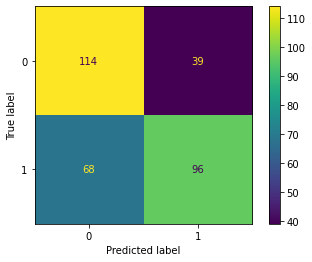

In [46]:
y_preds_logreg = logreg.predict(X_test_sc)
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot();

In [47]:
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       153
           1       0.71      0.59      0.64       164

    accuracy                           0.66       317
   macro avg       0.67      0.67      0.66       317
weighted avg       0.67      0.66      0.66       317



The logistic regression model using all numbers of unique word extracting from titles can predict the sources of subreddit post with accuracy about 66.24%

#### logistic regression using all quantitative features extracting from titles

In [48]:
# Set X and y
X = df[['num_words', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'mean_word_len']]
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [49]:
# Instantiate our StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform(X_test)

In [50]:
logreg =LogisticRegression()
logreg.fit(X_train_sc, y_train)
logreg.predict(X_test_sc)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient(s): {logreg.coef_}')
print(f'Training accuracry: {logreg.score(X_train_sc, y_train)}')
print(f'Testing accuracry: {logreg.score(X_test_sc, y_test)}')

Logistic Regression Intercept: [0.49713267]
Logistic Regression Coefficient(s): [[-0.11239765 -0.30114177  0.54935492  0.35666803  1.9597962  -0.1317296 ]]
Training accuracry: 0.7731225296442688
Testing accuracry: 0.7476340694006309


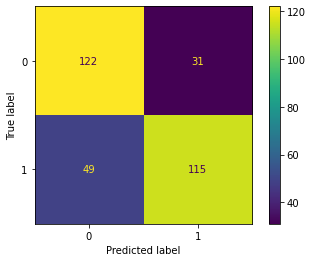

In [51]:
y_preds_logreg = logreg.predict(X_test_sc)
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot();

In [52]:
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       153
           1       0.79      0.70      0.74       164

    accuracy                           0.75       317
   macro avg       0.75      0.75      0.75       317
weighted avg       0.75      0.75      0.75       317



In [53]:
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_preds_logreg,
                        'predicted_probs':
                        logreg.predict_proba(X_test_sc).round(2)[:,1]})

pred_df.head()

,is_nfl,predicted_values,predicted_probs
760,1,1,0.85
1507,0,0,0.16
954,0,0,0.23
1375,0,0,0.24
907,0,0,0.29


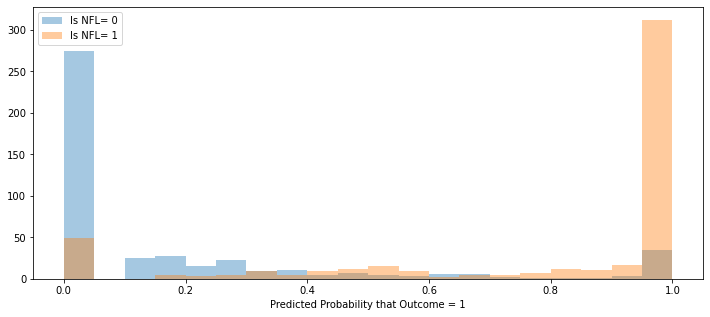

In [54]:
# Distplot
plt.figure(figsize=(12,5))

# Plot distributions of predicted probabilities by actual value 
for group in pred_df.groupby('is_nfl'):
    sns.distplot(group[1], kde=False, bins=20, 
                 label=f'Is NFL= {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

In [55]:
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

In [56]:
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.9)]

,is_nfl,predicted_values,predicted_probs,title
1535,0,1,0.91,saint josephs hawks fans weve started a new co...
1026,0,1,0.97,fighting for life how maryland softball star m...
986,0,1,1.00,video game fans ncaa 14 dynasty season 2 uc ...
1304,0,1,0.91,through 3 quarters uk has not completed a pass...
990,0,1,1.00,video game fans ncaa 14 dynasty season 2 uc ...
1020,0,1,0.99,wassup i am a new twitch streamer recently nca...


In [57]:
df_results[(df_results['is_nfl']==1) & (df_results['predicted_probs'] < 0.2)]

,is_nfl,predicted_values,predicted_probs,title
784,1,0,0.17,main strengths and weaknesses of every team
758,1,0,0.19,vikings justin jefferson trying to not be a virus
434,1,0,0.18,screens on 3rd down
424,1,0,0.18,the broncos russell wilson adventure is going ...


The logistic regression model using all quantitative features extracting from titles can predict the sources of subreddit post with accuracy about 74.76% which improve from previous model. However, the model has poor formance in predicting short posts because the model usually predict short posts are from NCAA subreddit when in fact a lot of them are from NFL subreddit. 

### Classification title post from text using Logistic Regression model

In [58]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [59]:
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey  studentathlete...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and broncos have combi...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                        highlight burrow is picked off
Name: title, Length: 1265, dtype: object

In [60]:
#drop 10 most common words from NFL post
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey studentathletes...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and have combined for ...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                                  burrow is picked off
Name: title, Length: 1265, dtype: object

In [61]:
#drop 10 most common words from NCAA post
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train

1443    your bracket either dies first round or lives ...
1097    repost graduate student survey studentathletes...
775     pelissero attorneys for the commanders sent a ...
431     nflpa president tretter we do not believe this...
1426    can someone find me a free reddit link to the ...
                              ...                        
503     jennaharner11 the colts and have combined for ...
1558    fsu coach jimbo fisher cuts media interview sh...
1125                                         drug testing
1399    xfl ceo oliver luck to headline njcaas its fir...
161                                  burrow is picked off
Name: title, Length: 1265, dtype: object

In [62]:
X_train.str.contains(' nfl ').value_counts()

False    1265
Name: title, dtype: int64

In [84]:
# Gridsearch Vectorizer with Logistic Regression
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': [50, 100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe2_params = {'tv__max_features': [50, 100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



In [85]:
grid1.score(X_train, y_train)

0.8434782608695652

In [86]:
grid1.score(X_test, y_test)

0.7791798107255521

In [87]:
grid2.score(X_train, y_train)

0.83399209486166

In [88]:
grid2.score(X_test, y_test)

0.7728706624605678

In [ ]:
pipe1.get_params()

In [ ]:
y_preds_grid1 = grid1.predict(X_test)
cm_grid1 = confusion_matrix(y_test, y_preds_grid1)
ConfusionMatrixDisplay(confusion_matrix=cm_grid1).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid1))

In [ ]:
y_preds_grid2 = grid2.predict(X_test)
cm_grid2 = confusion_matrix(y_test, y_preds_grid2)
ConfusionMatrixDisplay(confusion_matrix=cm_grid2).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid2))

In [ ]:
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_preds_grid1,
                        'predicted_probs':
                        grid1.predict_proba(X_test).round(2)[:,1]})

pred_df.head(10)

In [ ]:
# Distplot
plt.figure(figsize=(12,5))

# Plot distributions of predicted probabilities by actual value 
for group in pred_df.groupby('is_nfl'):
    sns.distplot(group[1], kde=False, bins=20, 
                 label=f'Is NFL= {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

In [ ]:
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

In [ ]:
# indepth exploring True Subreddit = NCAA but Predicted  = NFL
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.7)]

In [ ]:
df['title'].loc[1205]

In [ ]:
df['title'].loc[1278]

In [ ]:
df['title'].loc[1304]

In [ ]:
df_results[(df_results['is_nfl']==1) & (df_results['predicted_probs'] < 0.3)]

In [ ]:
df['title'].loc[819]

In [ ]:
df['title'].loc[698]

In [ ]:
df['title'].loc[359]

In [ ]:
df['title'].loc[227]

In [ ]:
df['title'].loc[33]

### Stemmatization before vectorization

In [ ]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train= X_train.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [ ]:
# Gridsearch Vectorizer with Logistic Regression
pipe3 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe3_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')                                       
# ==========================================================================
pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')

In [ ]:
y_preds_grid3 = grid3.predict(X_test)
cm_grid3 = confusion_matrix(y_test, y_preds_grid3)
ConfusionMatrixDisplay(confusion_matrix=cm_grid3).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid3))

In [ ]:
y_preds_grid4 = grid4.predict(X_test)
cm_grid4 = confusion_matrix(y_test, y_preds_grid4)
ConfusionMatrixDisplay(confusion_matrix=cm_grid4).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid4))

### Lemmatization before vectorization 

In [ ]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train = X_train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
#Gridsearch Vectorizer with Logistic Regression
pipe5 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe5_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')                                       
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe6_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

In [ ]:
y_preds_grid5 = grid5.predict(X_test)
cm_grid5 = confusion_matrix(y_test, y_preds_grid5)
ConfusionMatrixDisplay(confusion_matrix=cm_grid5).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid5))

In [ ]:
y_preds_grid6 = grid6.predict(X_test)
cm_grid6 = confusion_matrix(y_test, y_preds_grid6)
ConfusionMatrixDisplay(confusion_matrix=cm_grid6).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid6))

### Stem and Lemmatize

In [ ]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
X_train = X_train.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
X_train = X_train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
#Gridsearch Vectorizer with Logistic Regression
pipe7 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe7_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid7 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid7.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid7.best_score_}')
print(f'Best params:{grid7.best_params_}')
print('')                                       
# ==========================================================================
pipe8 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe8_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid8 = GridSearchCV(pipe8,pipe8_params,cv=5)
grid8.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid8.best_score_}')
print(f'Best params:{grid8.best_params_}')
print('')

In [ ]:
y_preds_grid7 = grid7.predict(X_test)
cm_grid7 = confusion_matrix(y_test, y_preds_grid7)
ConfusionMatrixDisplay(confusion_matrix=cm_grid7).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid7))

In [ ]:
y_preds_grid8 = grid8.predict(X_test)
cm_grid8 = confusion_matrix(y_test, y_preds_grid8)
ConfusionMatrixDisplay(confusion_matrix=cm_grid8).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid8))

In [ ]:
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_preds_grid8,
                        'predicted_probs':
                        grid8.predict_proba(X_test).round(2)[:,1]})

pred_df.head(10)

In [ ]:
# Distplot
plt.figure(figsize=(12,5))

# Plot distributions of predicted probabilities by actual value 
for group in pred_df.groupby('is_nfl'):
    sns.distplot(group[1], kde=False, bins=20, 
                 label=f'Is NFL= {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

In [ ]:
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

In [ ]:
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.75)]

In [ ]:
df['title'].loc[1312]

In [ ]:
df['title'].loc[1209]

In [ ]:
df_results[(df_results['is_nfl']==1) & (df_results['predicted_probs'] < 0.25)]

In [ ]:
df['title'].loc[227]

In [ ]:
df['title'].loc[33]

In [ ]:
df['title'].loc[819]

### Model with number of wordsand bag of word

In [ ]:
df['title_tokens'] = df.title.apply(word_tokenize)
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

In [ ]:
def featurize_unigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add text length
        feat_dic['LENGTH'] = len(tokens)
    return feat_dic

def featurize_bigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add bigram
        if i < len(tokens) - 1:
            bigram = '|'.join(tokens[i:i+2]) # e.g. ฉัน|ไป
            feat_dic[bigram] = 1
        ## add text length
        feat_dic['text_length'] = len(tokens)
    return feat_dic

In [ ]:
from dis import dis
from matplotlib.pyplot import cla


def train_predict(X_column_name, featurize_function_name, show_confusion_matrix=False, return_model=False):
    ## make X : featurize each record as dictionary
    X_train = train[X_column_name].apply(featurize_function_name)
    X_test = test[X_column_name].apply(featurize_function_name)

    ## make y
    y_train = train['is_nfl']
    y_test = test['is_nfl']

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
        disp.plot(xticks_rotation=80)

    # return model
    if return_model:
        return pipe

In [ ]:
train_predict('title', featurize_unigram)

## Building alternative models

In [ ]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))


In [ ]:
# CountVectorizer with NaiveBayes, and RandomForest
pipe9 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe9_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid9 = GridSearchCV(pipe9,pipe9_params,cv=5)
grid9.fit(X_train, y_train)
print(f'CountVectorizer+NaieveBayes:        {grid9.best_score_}')
print(f'Best params:{grid9.best_params_}')
print('')
# ==========================================================================
pipe10 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe10_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid10 = GridSearchCV(pipe10,pipe10_params,cv=5)
grid10.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:        {grid10.best_score_}')
print(f'Best params:{grid10.best_params_}')

In [ ]:
y_preds_grid9 = grid9.predict(X_test)
cm_grid9 = confusion_matrix(y_test, y_preds_grid9)
ConfusionMatrixDisplay(confusion_matrix=cm_grid9).plot();

In [ ]:
y_preds_grid10 = grid10.predict(X_test)
cm_grid10 = confusion_matrix(y_test, y_preds_grid10)
ConfusionMatrixDisplay(confusion_matrix=cm_grid10).plot();

In [ ]:
# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe11 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe11_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid11 = GridSearchCV(pipe11,pipe11_params,cv=5)
grid11.fit(X_train, y_train)
print(f'TfidVectorizer+NaieveBayes:         {grid11.best_score_}')
print(f'Best params:{grid11.best_params_}')
print('')
# ==========================================================================
pipe12 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe12_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid12 = GridSearchCV(pipe12,pipe12_params,cv=5)
grid12.fit(X_train, y_train)
print(f'TfidVectorizer+RandomForest:         {grid12.best_score_}')
print(f'Best params:{grid12.best_params_}')
print('')

In [ ]:
y_preds_grid11 = grid11.predict(X_test)
cm_grid11 = confusion_matrix(y_test, y_preds_grid11)
ConfusionMatrixDisplay(confusion_matrix=cm_grid11).plot();

In [ ]:
print(classification_report(y_test, y_preds_grid11))

In [ ]:
y_preds_grid12 = grid12.predict(X_test)
cm_grid12 = confusion_matrix(y_test, y_preds_grid12)
ConfusionMatrixDisplay(confusion_matrix=cm_grid12).plot();

In [ ]:
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_preds_grid11,
                        'predicted_probs':
                        grid11.predict_proba(X_test).round(2)[:,1]})


In [ ]:
# Distplot
plt.figure(figsize=(12,5))

# Plot distributions of predicted probabilities by actual value 
for group in pred_df.groupby('is_nfl'):
    sns.distplot(group[1], kde=False, bins=20, 
                 label=f'Is NFL= {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

In [ ]:
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

In [ ]:
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.7)]

In [ ]:
df['title'].loc[1089]

In [ ]:
df['title'].loc[1304]

In [ ]:
df['title'].loc[1397]

In [ ]:
df_results[(df_results['is_nfl']==1) & (df_results['predicted_probs'] < 0.2)]

In [ ]:
df['title'].loc[746]

In [ ]:
df['title'].loc[761]

In [ ]:
df['title'].loc[359]

In [ ]:
df['title'].loc[77]